In [1]:
import pandas as pd
df=pd.read_csv('c:/data/rides/rides2.csv')
df.columns

Index(['weekend', 'num.child', 'distance', 'rides', 'games', 'wait', 'clean',
       'overall'],
      dtype='object')

In [2]:
cols=['weekend', 'num.child', 'distance', 'rides', 'games', 'wait', 'clean']
X=df[cols]
y=df['overall']
y.value_counts()

1    255
0    245
Name: overall, dtype: int64

In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['overall'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
X=df_samp[cols]
y=df_samp['overall']
y.value_counts()

0    245
1    245
Name: overall, dtype: int64

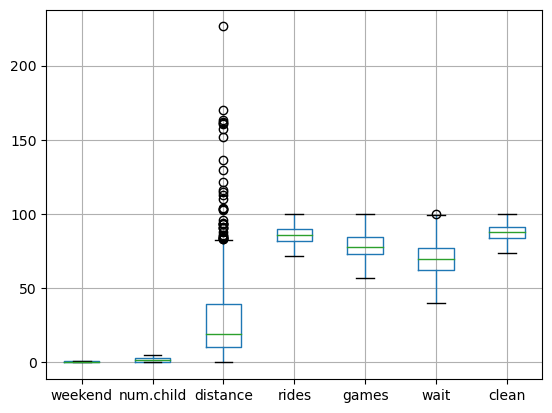

In [4]:
import matplotlib.pyplot as plt
X.boxplot()
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
df_ss = pd.DataFrame(ss.transform(X),columns=X.columns)
df_ss

,weekend,num.child,distance,rides,games,wait,clean
0,1.033204,-1.159150,2.715919,0.222582,-0.684357,-0.907906,0.232027
1,1.033204,-1.159150,-0.147105,0.405270,-0.807778,-0.351234,0.232027
2,-0.967863,2.174087,-0.251336,-0.873549,0.056169,-2.021251,-1.724830
3,1.033204,-0.492503,-0.123242,-1.604302,-0.684357,-1.093464,-0.550716
4,-0.967863,-1.159150,-0.618469,-0.690860,-1.054620,0.019881,-0.942087
...,...,...,...,...,...,...,...
485,1.033204,0.174145,0.343347,1.866777,1.166959,0.390996,1.797513
486,1.033204,0.174145,-0.285608,-0.325484,-0.314094,1.226005,-0.159344
487,-0.967863,0.840792,-0.733693,2.049465,0.673275,-1.279021,1.601828
488,1.033204,1.507440,-0.195983,1.684088,2.154327,1.318783,1.601828


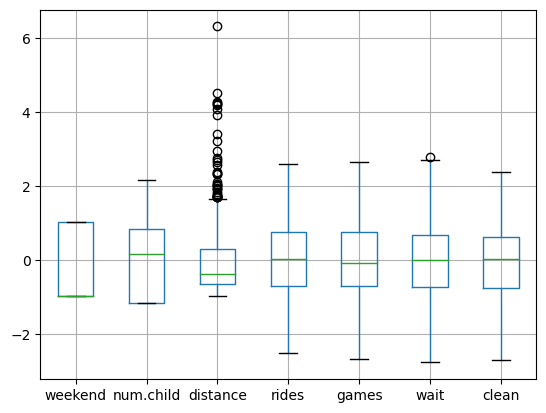

In [6]:
df_ss.boxplot()
plt.show()

In [7]:
X=df_ss[cols]

In [8]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
#10의 -6승부터 3승까지 10개의 값
param_range = np.logspace(-6, 3, 10)
train_scores, test_scores = validation_curve(SVC(), X, y, param_name="gamma", param_range=param_range,scoring="accuracy", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#최고 정확도
print(np.max(test_scores_mean))
#최적의 gamma
print(param_range[np.argmax(test_scores_mean)])

0.7938775510204081
0.1


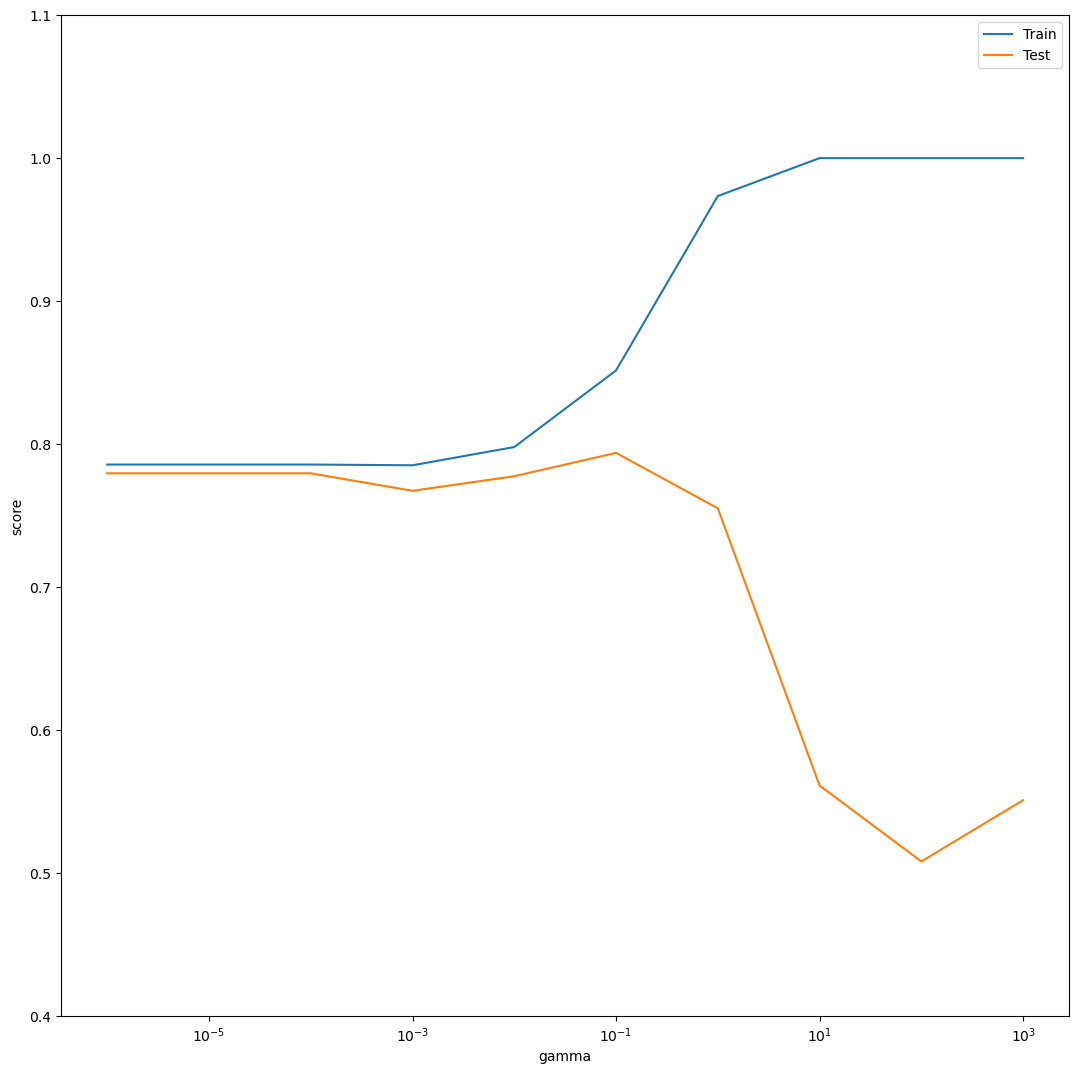

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 13))
plt.xlabel('gamma')
plt.ylabel("score")
plt.ylim(0.4, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Train")
plt.semilogx(param_range, test_scores_mean, label="Test")
plt.legend(loc="best")
plt.show()